<a href="https://colab.research.google.com/github/scollins26/myDATA2000/blob/Homeworks/Neural_Networks_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:

pd.set_option('display.max_columns', None)
X.head()



,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [4]:
y.columns

Index(['Diabetes_binary'], dtype='object')

In [5]:
new_data = X.loc[:, [
    'Age', 'BMI',
    'HighChol', 'DiffWalk', 'PhysHlth',
    'PhysActivity', 'MentHlth'
]]

extracted_col = y['Diabetes_binary']
new_data = new_data.join(extracted_col)



new_data.head()


,Age,BMI,HighChol,DiffWalk,PhysHlth,PhysActivity,MentHlth,Diabetes_binary
0,9,40,1,1,15,0,18,0
1,7,25,0,0,0,1,0,0
2,9,28,1,1,30,0,30,0
3,11,27,0,0,0,1,0,0
4,11,24,1,0,0,1,3,0


In [6]:
new_data['overall_health'] = (new_data['PhysHlth'] + new_data['MentHlth'])/2
new_data['unhealthy_old'] = ((new_data['Age']>35) & (new_data['PhysHlth']> 7)).astype(int)

new_data.head()

,Age,BMI,HighChol,DiffWalk,PhysHlth,PhysActivity,MentHlth,Diabetes_binary,overall_health,unhealthy_old
0,9,40,1,1,15,0,18,0,16.5,0
1,7,25,0,0,0,1,0,0,0.0,0
2,9,28,1,1,30,0,30,0,30.0,0
3,11,27,0,0,0,1,0,0,0.0,0
4,11,24,1,0,0,1,3,0,1.5,0


In [7]:
new_data.describe()

,Age,BMI,HighChol,DiffWalk,PhysHlth,PhysActivity,MentHlth,Diabetes_binary,overall_health,unhealthy_old
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.0
mean,8.032119,28.382364,0.424121,0.168224,4.242081,0.756544,3.184772,0.139333,3.713426,0.0
std,3.054220,6.608694,0.494210,0.374066,8.717951,0.429169,7.412847,0.346294,6.645639,0.0
min,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,6.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,8.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.0
75%,10.000000,31.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,3.500000,0.0
max,13.000000,98.000000,1.000000,1.000000,30.000000,1.000000,30.000000,1.000000,30.000000,0.0


In [8]:
avg_age = new_data['Age'].mean()
st_dev = new_data['Age'].std()
new_data['Age'] = (new_data['Age'] - avg_age) / st_dev
new_data.describe()

,Age,BMI,HighChol,DiffWalk,PhysHlth,PhysActivity,MentHlth,Diabetes_binary,overall_health,unhealthy_old
count,2.536800e+05,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.0
mean,9.500792e-17,28.382364,0.424121,0.168224,4.242081,0.756544,3.184772,0.139333,3.713426,0.0
std,1.000000e+00,6.608694,0.494210,0.374066,8.717951,0.429169,7.412847,0.346294,6.645639,0.0
min,-2.302427e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-6.653479e-01,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,-1.051634e-02,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.0
75%,6.443152e-01,31.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,3.500000,0.0
max,1.626563e+00,98.000000,1.000000,1.000000,30.000000,1.000000,30.000000,1.000000,30.000000,0.0


In [9]:
final_data = new_data.loc[:, [
    'Age', 'BMI', 'overall_health'
]]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    final_data,
    y,
    test_size=0.2,
)

X_train.head()

,Age,BMI,overall_health
58624,-0.337932,25,13.0
106017,0.971731,31,3.0
19981,0.971731,31,0.0
17391,0.971731,26,0.0
220244,-0.010516,28,0.0


In [11]:
# def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
#   df = dataframe.copy()
#   df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
#   ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
#   if shuffle:
#     ds = ds.shuffle(buffer_size=len(dataframe))
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(batch_size)
#   return ds

In [12]:
import tensorflow as tf



In [13]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.int64,
            name='BMI'),
    'overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health')
}

In [14]:
# from tensorflow.python.ops.gradients_util import AggregationMethod
# train_Diabetes_binary_normalized = tf.keras.layers.Normalization(axis=None)
# train_Diabetes_binary_normalized.adapt(
#     np.array(new_data['Diabetes_binary']))

# test_Diabetes_binary_normalized = tf.keras.layers.Normalization(axis=None)
# test_Diabetes_binary_normalized.adapt(
#     np.array(new_data['Diabetes_binary']))

age = tf.keras.layers.Normalization(
    name='normalization_age',
    axis=None)
age.adapt(X_train['Age'])
age = age(inputs.get('Age'))

BMI = tf.keras.layers.Normalization(
    name='normalization_BMI',
    axis=None)
BMI.adapt(X_train['BMI'])
BMI = BMI(inputs.get('BMI'))

overall_health = tf.keras.layers.Normalization(
    name='normalization_overall_health',
    axis=None)
overall_health.adapt(X_train['overall_health'])
overall_health = overall_health(inputs.get('overall_health'))

In [15]:
print(overall_health)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_overall_health/truediv:0', description="created by layer 'normalization_overall_health'")


In [16]:
preprocessing_layers = tf.keras.layers.Concatenate()([
    age, BMI, overall_health
])

hidden1 = tf.keras.layers.Dense(
    units=32,
    name = 'hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
    units=16,
    name = 'hidden2')(hidden1)

In [17]:
dense_output = tf.keras.layers.Dense(
    units = 1,
    name = 'dense_output')(hidden2)

In [18]:
outputs ={
    'dense_output' : dense_output
}

In [19]:

dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)

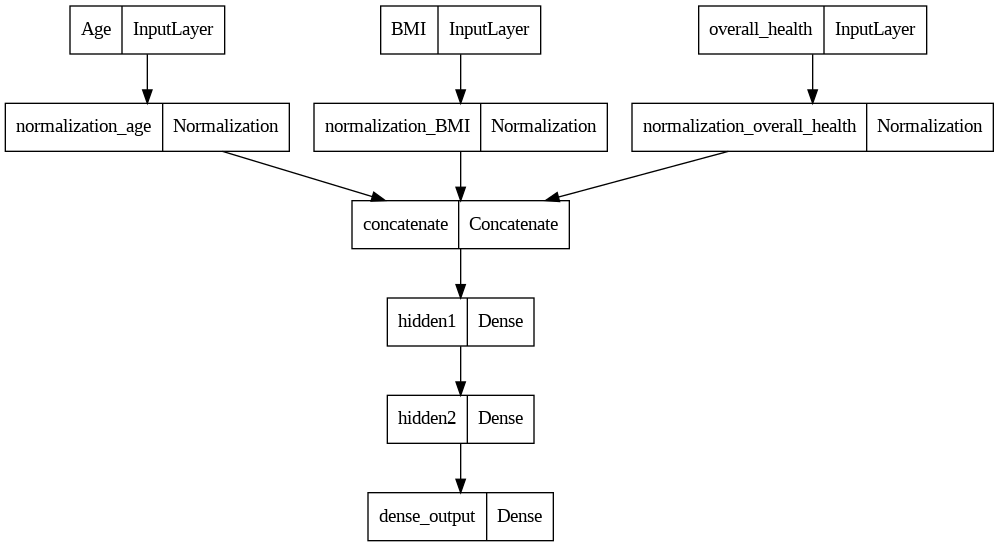

In [20]:
tf.keras.utils.plot_model(dnn_model)


In [21]:

tf.config.run_functions_eagerly(True)

history = dnn_model.fit(
    {name:np.array(value) for name, value in X_train.items()},
    tf.cast(np.array(y_train.values), tf.float32),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

# Get details that will be useful for plotting the loss curve.
epochs = history.epoch
hist = pd.DataFrame(history.history)
f1_score = hist['f1_score']


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


163/163 [==============================] - 5s 28ms/step - loss: 0.7920 - f1_score: 0.2434 - val_loss: 0.3860 - val_f1_score: 0.2478
Epoch 2/15
163/163 [==============================] - 4s 27ms/step - loss: 0.3776 - f1_score: 0.2434 - val_loss: 0.3812 - val_f1_score: 0.2478
Epoch 3/15
163/163 [==============================] - 5s 31ms/step - loss: 0.7376 - f1_score: 0.2434 - val_loss: 0.3968 - val_f1_score: 0.2478
Epoch 4/15
163/163 [==============================] - 4s 26ms/step - loss: 0.3694 - f1_score: 0.2434 - val_loss: 0.3691 - val_f1_score: 0.2478
Epoch 5/15
163/163 [==============================] - 5s 29ms/step - loss: 0.3619 - f1_score: 0.2434 - val_loss: 0.3702 - val_f1_score: 0.2478
Epoch 6/15
163/163 [==============================] - 4s 27ms/step - loss: 0.3721 - f1_score: 0.2434 - val_loss: 0.3673 - val_f1_score: 0.2478
Epoch 7/15
163/163 [==============================] - 4s 26ms/step - loss: 0.3618 - f1_score: 0.2434 - val_loss: 0.3679 - val_f1_score: 0.2478
Epoch 8/15

In [22]:
from matplotlib import pyplot as plt


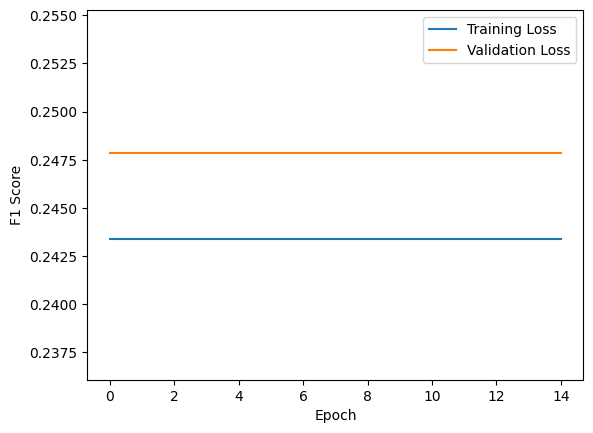

In [27]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("F1 Score")

plt.plot(epochs, f1_score, label="Training Loss")
plt.plot(epochs, history.history["val_f1_score"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_f1_score_lists = f1_score.tolist() + history.history["val_f1_score"]
highest_loss = max(merged_f1_score_lists)
lowest_loss = min(merged_f1_score_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [31]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in X_test.items()},
    y=tf.cast(np.array(y_test.values), tf.float32),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


51/51 [==============================] - 1s 26ms/step - loss: 0.4049 - f1_score: 0.2458


{'loss': 0.40492385625839233, 'f1_score': array([0.24582511], dtype=float32)}